In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
all_beauty_path = "../data/raw/All_Beauty.jsonl"
handmade_path = "../data/raw/Handmade_Products.jsonl"
health_care_path = "../data/raw/Health_and_Personal_Care.jsonl"

# ------------- Data -------------

In [3]:
all_beauty_df = pd.read_json(all_beauty_path, lines=True)
all_beauty_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


In [4]:
handmade_df = pd.read_json(handmade_path, lines=True)
handmade_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Beautiful colors,I bought one for myself and one for my grandda...,[],B08GPJ1MSN,B08GPJ1MSN,AF7OANMNHQJC3PD4HRPX2FATECPA,2021-05-21 14:31:35.111,1,True
1,5,You simply must order order more than one!,I’ve ordered three bows so far. Have not been ...,[],B084TWHS7W,B084TWHS7W,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,2020-04-24 21:15:46.965,0,True
2,5,Great,As pictured. Used a frame from the dollar stor...,[],B07V3NRQC4,B07V3NRQC4,AEYORY2AVPMCPDV57CE337YU5LXA,2020-06-06 13:09:11.297,0,True
3,5,Well made and so beautiful,"This is beyond beautiful. So shiny, the size ...",[],B071ZMDK26,B071ZMDK26,AEINY4XOINMMJCK5GZ3M6MMHBN6A,2019-06-02 01:14:39.784,2,True
4,5,Smells just like the real thing!,Oh wow what a pleasant surprise! This smells g...,[],B01MPVZ4YP,B01MPVZ4YP,AGCPAPUHXYA3EEIL2KGSQTGO5HRA,2019-01-08 00:12:11.674,1,True


In [5]:
health_care_df = pd.read_json(health_care_path, lines=True)
health_care_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-06 00:49:35.902,3,True
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2020-11-02 22:03:06.880,3,True
2,5,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2019-07-24 11:13:58.905,0,True
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,2022-09-04 02:29:02.725,7,True
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:53:07.262,0,True


# ------------- Shapes -------------

In [6]:
print(f"All Beauty: {all_beauty_df.shape}")
print(f"Handmade Products: {handmade_df.shape}")
print(f"Health and Personal Care: {health_care_df.shape}")

All Beauty: (701528, 10)
Handmade Products: (664162, 10)
Health and Personal Care: (494121, 10)


# ------------- General Info -------------

In [7]:
all_beauty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             701528 non-null  int64         
 1   title              701528 non-null  object        
 2   text               701528 non-null  object        
 3   images             701528 non-null  object        
 4   asin               701528 non-null  object        
 5   parent_asin        701528 non-null  object        
 6   user_id            701528 non-null  object        
 7   timestamp          701528 non-null  datetime64[ns]
 8   helpful_vote       701528 non-null  int64         
 9   verified_purchase  701528 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 48.8+ MB


In [8]:
handmade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664162 entries, 0 to 664161
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             664162 non-null  int64         
 1   title              664162 non-null  object        
 2   text               664162 non-null  object        
 3   images             664162 non-null  object        
 4   asin               664162 non-null  object        
 5   parent_asin        664162 non-null  object        
 6   user_id            664162 non-null  object        
 7   timestamp          664162 non-null  datetime64[ns]
 8   helpful_vote       664162 non-null  int64         
 9   verified_purchase  664162 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 46.2+ MB


In [9]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             494121 non-null  int64         
 1   title              494121 non-null  object        
 2   text               494121 non-null  object        
 3   images             494121 non-null  object        
 4   asin               494121 non-null  object        
 5   parent_asin        494121 non-null  object        
 6   user_id            494121 non-null  object        
 7   timestamp          494121 non-null  datetime64[ns]
 8   helpful_vote       494121 non-null  int64         
 9   verified_purchase  494121 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 34.4+ MB


# ------------- Data Distribution -------------

In [10]:
all_beauty_df.describe()

,rating,timestamp,helpful_vote
count,701528.000000,701528,701528.000000
mean,3.960245,2019-04-09 03:31:48.115045888,0.923588
min,1.000000,2000-11-01 04:24:18,0.000000
25%,3.000000,2017-08-01 19:39:25.777499904,0.000000
50%,5.000000,2019-10-20 18:11:28.616499968,0.000000
75%,5.000000,2021-03-02 01:05:05.557999872,1.000000
max,5.000000,2023-09-09 00:39:36.666000,646.000000
std,1.494452,NaN,5.471391


In [11]:
handmade_df.describe()

,rating,timestamp,helpful_vote
count,664162.000000,664162,664162.000000
mean,4.498472,2020-06-02 04:34:43.398212352,0.638474
min,1.000000,2007-05-15 06:53:54,0.000000
25%,5.000000,2019-01-22 19:36:58.206749952,0.000000
50%,5.000000,2020-07-18 00:48:20.762500096,0.000000
75%,5.000000,2021-12-16 22:33:16.752750080,0.000000
max,5.000000,2023-09-12 03:23:33.326000,1519.000000
std,1.130100,NaN,4.131113


In [12]:
health_care_df.describe()

,rating,timestamp,helpful_vote
count,494121.000000,494121,494121.000000
mean,3.996523,2018-11-17 19:50:46.048134656,1.131802
min,1.000000,2001-02-05 03:50:11,0.000000
25%,3.000000,2016-12-24 22:14:13,0.000000
50%,5.000000,2019-04-01 06:57:03.632999936,0.000000
75%,5.000000,2021-01-04 20:01:21.267000064,1.000000
max,5.000000,2023-09-11 05:03:12.467000,7326.000000
std,1.478626,NaN,15.437500


# ------------- Rating Distribution -------------

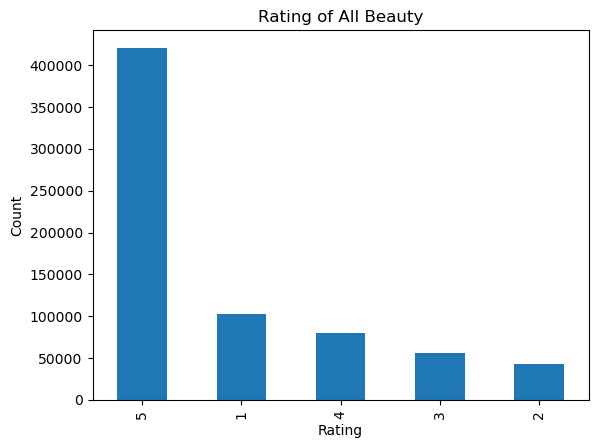

In [14]:
all_beauty_df["rating"].value_counts().plot(kind="bar")
plt.title("Rating of All Beauty")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

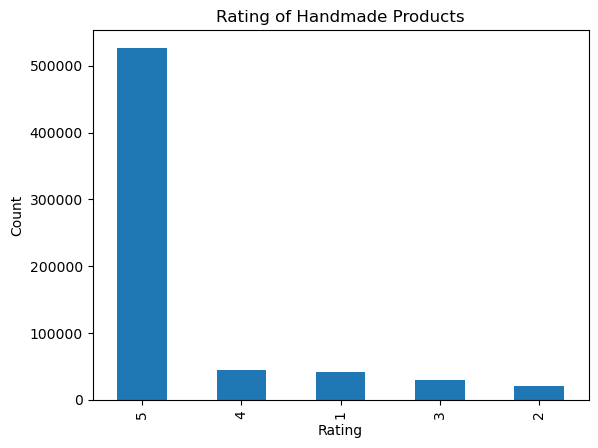

In [15]:
handmade_df["rating"].value_counts().plot(kind="bar")
plt.title("Rating of Handmade Products")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

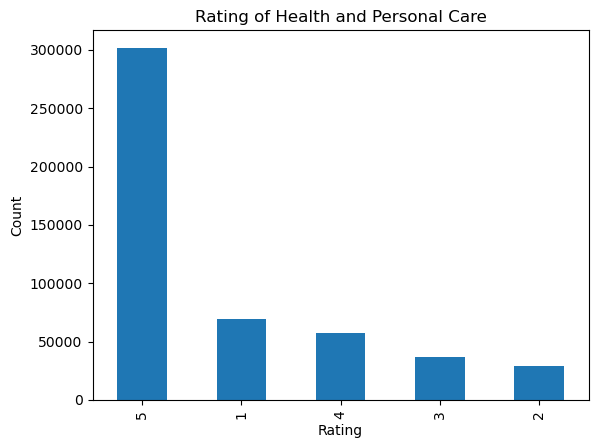

In [16]:
health_care_df["rating"].value_counts().plot(kind="bar")
plt.title("Rating of Health and Personal Care")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# ------------- Verified Purchases -------------

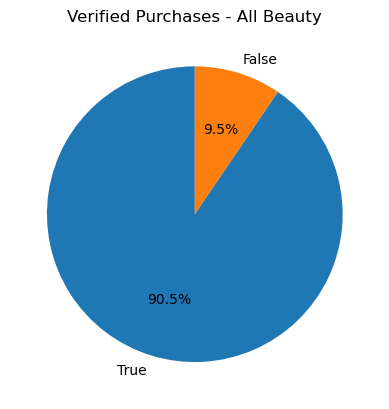

In [21]:
all_beauty_df["verified_purchase"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Verified Purchases - All Beauty")
plt.ylabel("") 
plt.show()

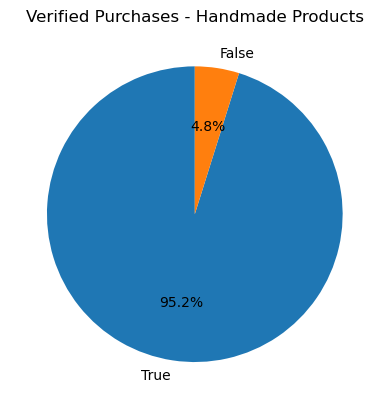

In [25]:
handmade_df["verified_purchase"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Verified Purchases - Handmade Products")
plt.ylabel("")
plt.show()

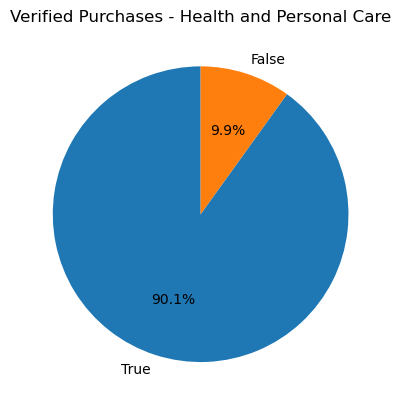

In [26]:
health_care_df["verified_purchase"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Verified Purchases - Health and Personal Care")
plt.ylabel("")
plt.show()